In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, gumbel_r, lognorm, genextreme, poisson, geom
from scipy.stats import probplot, kstest
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [125]:
path = r'C:\Users\LENOVO\OneDrive\inFarmer\4. Proposal & Presentations\Proposals\Forest_Fire\Brazil_Forest_Data\Lower Forest Data'
path = path.replace("\\","/")
path

'C:/Users/LENOVO/OneDrive/inFarmer/4. Proposal & Presentations/Proposals/Forest_Fire/Brazil_Forest_Data/Lower Forest Data'

In [126]:
data_1 = pd.read_csv(path+'/data.csv')
# #set the first column of data as the index
# data.set_index('Unnamed: 0', inplace=True)
data_1

,Date,DOY,Year,Month,Fire Weather Index,Fire Build Index,Drought Code,Duff moisture code,Fire Fuel Moisture Code,Fire severity index,Initial Spead Index
0,03/01/1940,3,1940,1,0.004729,3.105760,8.283793,2.930334,34.07,0.00,0.01
1,04/01/1940,4,1940,1,0.163287,3.420774,11.832993,2.681654,55.33,0.00,0.44
2,05/01/1940,5,1940,1,0.604935,5.729544,20.663929,4.386554,76.94,0.01,1.34
3,06/01/1940,6,1940,1,1.578040,7.925221,29.417784,5.986382,80.24,0.06,2.12
4,07/01/1940,7,1940,1,0.550387,7.741090,34.220470,5.400179,69.95,0.01,1.02
...,...,...,...,...,...,...,...,...,...,...,...
30582,26/09/2023,269,2023,9,49.100360,224.607970,816.015260,171.246610,94.41,26.80,14.17
30583,27/09/2023,270,2023,9,41.733720,228.308010,822.215330,174.996610,93.74,20.16,10.98
30584,28/09/2023,271,2023,9,28.668493,231.058010,827.747250,177.696660,90.91,10.32,6.19
30585,29/09/2023,272,2023,9,29.066023,234.039980,833.497250,180.478590,90.96,10.56,6.30


In [127]:
variables = data_1.columns
#FWI starts from 4
variable = variables[10]
variable

'Initial Spead Index'

In [128]:
data = data_1.groupby('Year')[variable].max()


In [129]:
data = pd.DataFrame(data).reset_index()
data

,Year,Initial Spead Index
0,1940,20.40
1,1941,17.42
2,1942,28.97
3,1943,20.22
4,1944,30.63
...,...,...
79,2019,26.41
80,2020,23.13
81,2021,17.83
82,2022,22.36


In [130]:
# # Function to fit distributions and plot probability plots
# def fit_and_plot_distribution(data, distribution):
#     params = distribution.fit(data)
#     _, p_value = kstest(data, distribution.cdf, params)
#     return params, p_value

# plt.subplots(nrows=2,ncols=2,figsize=(30, 10))

# for index, distribution in enumerate(distributions):
#     plt.subplot(2,2,index+1)
#     # Plot  Distribution
#     label = distribution
#     params, p_value = fit_and_plot_distribution(data[variable], distribution)
#     plt.hist(data[variable], bins=30, density=True, color='blue', alpha=0.7, label=distribution)
#     x_range = np.linspace(data[variable].min(), data[variable].max(), 100)
#     plt.plot(x_range, distribution.pdf(x_range,*params), color='red', linewidth=2)
#     plt.title(f'{label} Fit (p-value: {p_value:.4f})')


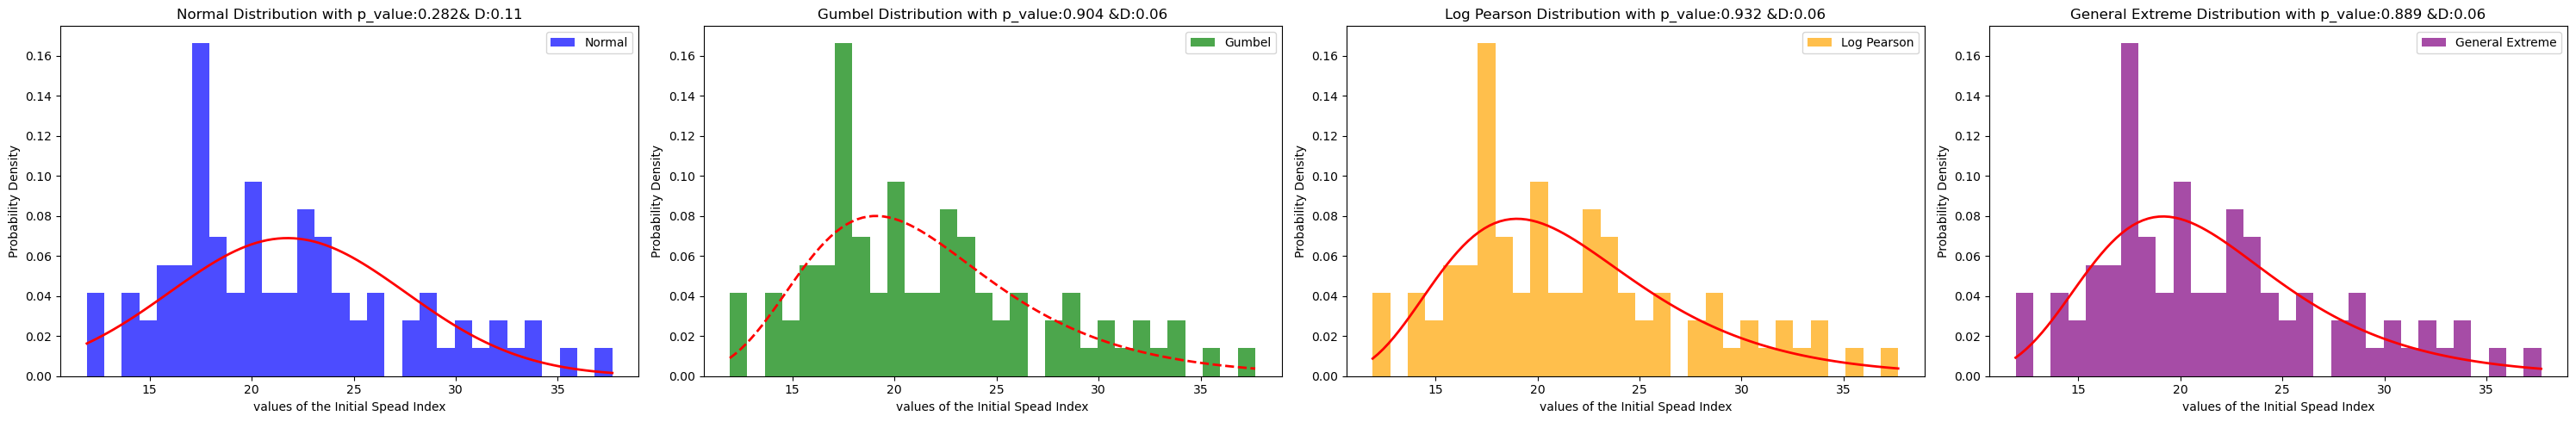

In [131]:
# Plot histograms for each distribution
plt.figure(figsize=(30, 5))
font_size = 10
n_cols = 4

# Plot Normal Distribution
plt.subplot(1, n_cols, 1)
#gives the mean and standard deviation of data, assuming it follows normal distribution
params_1 = norm.fit(data[variable])
#Kolmogorov-Smirnov (KS) test, D is KS Statistic which is maximum, and p_value is significance level 0.05 usually
D, p_value_1 = kstest(data[variable], norm.cdf, params_1)
plt.hist(data[variable], bins=30, density=True, color='blue', alpha=0.7, label='Normal')
x_range_normal = np.linspace(data[variable].min(), data[variable].max(), 100)
# ax2 = plt.gca().twinx()
plt.plot(x_range_normal, norm.pdf(x_range_normal,*params_1), color='red', linewidth=2)
plt.title(f'Normal Distribution with p_value:{round(p_value_1,3)}& D:{round(D,2)}')
plt.legend()
plt.xlabel(f'values of the {variable}',fontsize = font_size)
plt.ylabel('Probability Density',fontsize = font_size)


plt.subplot(1, n_cols, 2)
params_2 = gumbel_r.fit(data[variable])
D, p_value_2 = kstest(data[variable], gumbel_r.cdf, params_2)
plt.hist(data[variable], bins=30, density=True, color='green', alpha=0.7, label='Gumbel')
x_range_gumbel = np.linspace(data[variable].min(), data[variable].max(), 100)
# plt.plot(x_range_gumbel, gumbel_r.pdf(x_range_gumbel,*params_2), color='red', linewidth=2)
plt.title(f'Gumbel Distribution with p_value:{round(p_value_2,3)} &D:{round(D,2)}')
# ax2 = plt.gca().twinx()
# Plot the Gumbel distribution on the second y-axis
plt.plot(x_range_gumbel, gumbel_r.pdf(x_range_gumbel, *params_2), color='red', linewidth=2, linestyle='dashed')
# ax2.set_ylabel('Probability Density')
# ax2.tick_params('y', colors='red')
plt.legend()
plt.xlabel(f'values of the {variable}',fontsize = font_size)
plt.ylabel('Probability Density',fontsize = font_size)


plt.subplot(1, n_cols, 3)
params_3 = lognorm.fit(data[variable])
D, p_value_3 = kstest(data[variable], lognorm.cdf, params_3)
plt.hist(data[variable], bins=30, density=True, color='orange', alpha=0.7, label='Log Pearson')
x_range_lognorm = np.linspace(data[variable].min(), data[variable].max(), 100)
# ax2 = plt.gca().twinx()
plt.plot(x_range_lognorm, lognorm.pdf(x_range_lognorm,*params_3), color='red', linewidth=2)
plt.title(f'Log Pearson Distribution with p_value:{round(p_value_3,3)} &D:{round(D,2)}')
plt.legend()
plt.xlabel(f'values of the {variable}',fontsize = font_size)
plt.ylabel('Probability Density',fontsize = font_size)


plt.subplot(1, n_cols, 4)
params_4 = genextreme.fit(data[variable])
D, p_value_4 = kstest(data[variable], genextreme.cdf, params_4)
plt.hist(data[variable], bins=30, density=True, color='purple', alpha=0.7, label='General Extreme')
x_range_genextreme = np.linspace(data[variable].min(), data[variable].max(), 100)
# ax2 = plt.gca().twinx()
plt.plot(x_range_genextreme, genextreme.pdf(x_range_genextreme,*params_4), color='red', linewidth=2)
plt.ylabel('Probability Density',fontsize = font_size)
plt.title(f'General Extreme Distribution with p_value:{round(p_value_4,3)} &D:{round(D,2)}')
plt.legend()
plt.xlabel(f'values of the {variable}',fontsize = font_size)



plt.tight_layout()
plt.show()

In [132]:
# Create subplots with 1 row and 4 columns
fig = make_subplots(rows=1, cols=4, subplot_titles=[
    f'Normal Distribution', f'Gumbel Distribution', f'Log Pearson Distribution', f'General Extreme Distribution'
])

# Plot Normal Distribution
params_1 = norm.fit(data[variable])
D, p_value_1 = kstest(data[variable], norm.cdf, params_1)
x_range_normal = np.linspace(data[variable].min(), data[variable].max(), 100)
fig.add_trace(go.Histogram(x=data[variable], nbinsx=30, histnorm='probability density', name='Normal', opacity=0.7), row=1, col=1)
fig.add_trace(go.Scatter(x=x_range_normal, y=norm.pdf(x_range_normal, *params_1), mode='lines', name='Normal Fit', line=dict(color='red', width=2)), row=1, col=1)
fig.update_xaxes(title_text=f'Values of the {variable}', row=1, col=1)
fig.update_yaxes(title_text='Probability Density', row=1, col=1)
fig.update_layout(title_text=f'Normal Distribution with p_value: {round(p_value_1, 3)} & D: {round(D, 2)}', showlegend=False)

# Plot Gumbel Distribution
params_2 = gumbel_r.fit(data[variable])
D, p_value_2 = kstest(data[variable], gumbel_r.cdf, params_2)
x_range_gumbel = np.linspace(data[variable].min(), data[variable].max(), 100)
fig.add_trace(go.Histogram(x=data[variable], nbinsx=30, histnorm='probability density', name='Gumbel', opacity=0.7), row=1, col=2)
fig.add_trace(go.Scatter(x=x_range_gumbel, y=gumbel_r.pdf(x_range_gumbel, *params_2), mode='lines', name='Gumbel Fit', line=dict(color='red', width=2)), row=1, col=2)
fig.update_xaxes(title_text=f'Values of the {variable}', row=1, col=2)
fig.update_yaxes(title_text='Probability Density', row=1, col=2)
fig.update_layout(title_text=f'Gumbel Distribution with p_value: {round(p_value_2, 3)} & D: {round(D, 2)}', showlegend=False)

# Plot Log Pearson Distribution
params_3 = lognorm.fit(data[variable])
D, p_value_3 = kstest(data[variable], lognorm.cdf, params_3)
x_range_lognorm = np.linspace(data[variable].min(), data[variable].max(), 100)
fig.add_trace(go.Histogram(x=data[variable], nbinsx=30, histnorm='probability density', name='Log Pearson', opacity=0.7), row=1, col=3)
fig.add_trace(go.Scatter(x=x_range_lognorm, y=lognorm.pdf(x_range_lognorm, *params_3), mode='lines', name='Log Pearson Fit', line=dict(color='red', width=2)), row=1, col=3)
fig.update_xaxes(title_text=f'Values of the {variable}', row=1, col=3)
fig.update_yaxes(title_text='Probability Density', row=1, col=3)
fig.update_layout(title_text=f'Log Pearson Distribution with p_value: {round(p_value_3, 3)} & D: {round(D, 2)}', showlegend=False)

# Plot General Extreme Distribution
params_4 = genextreme.fit(data[variable])
D, p_value_4 = kstest(data[variable], genextreme.cdf, params_4)
x_range_genextreme = np.linspace(data[variable].min(), data[variable].max(), 100)
fig.add_trace(go.Histogram(x=data[variable], nbinsx=30, histnorm='probability density', name='General Extreme', opacity=0.7), row=1, col=4)
fig.add_trace(go.Scatter(x=x_range_genextreme, y=genextreme.pdf(x_range_genextreme, *params_4), mode='lines', name='General Extreme Fit', line=dict(color='red', width=2)), row=1, col=4)
fig.update_xaxes(title_text=f'Values of the {variable}', row=1, col=4)
fig.update_yaxes(title_text='Probability Density', row=1, col=4)
fig.update_layout(title_text=f'General Extreme Distribution with p_value: {round(p_value_4, 3)} & D: {round(D, 2)}', showlegend=False)

# Update layout to add title and adjust spacing
fig.update_layout(title_text="Distributions Comparison", showlegend=True, height=400, width=1200)

# Show the plot
fig.show()


In [133]:
# Create a time series plot with Plotly Graph Objects
figure = go.Figure()

# Add a scatter trace
figure.add_trace(go.Scatter(x=data['Year'], y=data[variable], mode='lines', name='Time Series'))
# Add trendline
figure.add_trace(go.Scatter(x=data['Year'], y=data[variable].rolling(window=20).mean(), 
                         mode='lines', name='Trend Line', line=dict(color='red')))

# Customize the layout if needed
figure.update_layout(
    title=f'Time Series Plot for {variable}',
    xaxis_title='Time',
    yaxis_title=variable,
    template='plotly_dark',  # You can choose a different template if desired
)

# Show the plot
figure.show()

In [137]:
from scipy.stats import genextreme
import numpy as np


# Return periods (in years)
return_periods = [2, 5, 10, 50]

# Function to estimate the values corresponding to return periods
def estimate_values_from_return_periods(return_periods, params):
    location, scale, shape = params
    return location + scale * ((-np.log(1 - 1/np.array(return_periods))) ** shape - 1) / shape

# Estimate the values corresponding to the given return periods
estimated_values = estimate_values_from_return_periods(return_periods, params_4)

# Print the results
for period, value in zip(return_periods, estimated_values):
    print(f"Estimated value for a {period}-year return period: {value}")


Estimated value for a 2-year return period: -3.369527871429053
Estimated value for a 5-year return period: -4.129328738837346
Estimated value for a 10-year return period: -4.133296122689199
Estimated value for a 50-year return period: -4.133424575826062


In [135]:
params_4

(0.009427100639550802, 19.110781718742807, 4.612953327798838)